# Linear Regression
Below is a simple linear regression model. Our data $(x^{(i)},t^{(i)})$ $(i=1,...,N)$ consist of features $x^{(i)}$ and labels
$t^{(i)}$. We assume that the true model is $t=\beta_0 +\beta_1x_1 + \beta_2x_2+\cdots + \beta_Dx_D = \beta^T x$ and that our data contain Gaussian noise. The goal is to learn a hypothesis of the form $\hat{t}=h_\beta(x)=\beta^Tx$ while minimizing the "loss" with respect to the parameter $\beta$. But first, we start with 2D data so that we can visualize:

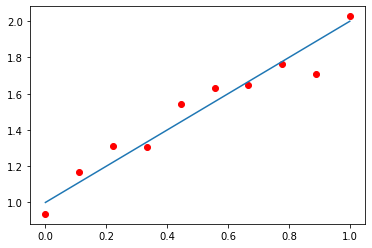

In [25]:
import numpy as np
import matplotlib.pyplot as plt 

# True parameters
beta0true = 1
beta1true = 1
betatrue = np.asarray([beta0true, beta1true])

# Set up features 
x = np.linspace(0,1,10) # set up the coordinate
Xtilde = np.hstack((np.ones((len(x), 1)), x.reshape(-1,1))) #feature matrix
t = Xtilde @ np.asarray(betatrue) # the true label
tnoisy = t+np.random.normal(0, .1, len(t)) # observed label

# plot the result
plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

In ordinary least squares (OLS) regression, we seek to minimize the loss function defined by the residual sum of squares (RSS) 
    $$\min l(\beta) = \min RSS = \min_\beta\frac{1}{N}\sum_{i=1}^N (t^{(i)}-h_\beta(x^{i}))^2$$
One can easily show that minimizing this loss function is equivalent to performing the maximum likelihood estimate (i.e., maximize with respect to $\beta$ the probability that we obtain this particular dataset) under the assumption that our data is iid with Gaussian noise on top of the true linear model. Rewriting the expression of RSS into vectorized form we get
    $$\min_\beta \frac{1}{N} \Vert \tilde X \beta - t\Vert ^2 = \frac{1}{N}(\tilde X \beta - t)^T(\tilde X \beta - t),$$
where $\tilde X = \begin{bmatrix} 1 & -x^{(1)}- \\ \vdots & \vdots \\  1 & -x^{(N)}-\\ \end{bmatrix}$ , $t=\begin{bmatrix} t^{(1)}\\ \vdots \\ t^{(N)}\end{bmatrix}$ , and $\beta = \begin{bmatrix} \beta_0\\ \beta_1\end{bmatrix}$.

Exapnding the vectorized expression above and setting the derivative with respect to $\beta$ to 0, we get the normal equation

$$\beta_{OLS}=(\tilde X ^T \tilde X )^{-1} \tilde X^T t,$$

which is the closed-form solution to the minimization problem. This expression holds true when the input feature is a multidimensional vector.

In [26]:
# Implementing the normal equation for OLS
beta_OLS = np.linalg.pinv(Xtilde.T @ Xtilde) @ Xtilde.T @ tnoisy
# Here we compute the Moore–Penrose inverse in case Xtilde.T @ Xtilde is not invertible
print('beta_OLS =', beta_OLS)

beta_OLS = [1.0408359  0.92677904]


We can also minimize the RSS using gradient descent. To do this, we need to compute the partial derivative with respect to $\beta_j$'s:
$$\partial_{\beta_0}l(\beta)= \frac{-2}{N}\sum_{i=1}^N (t^{(i)}-\beta^Tx^{i})$$
$$\partial_{\beta_j}l(\beta)= \frac{-2}{N}\sum_{i=1}^N (t^{(i)}-\beta^Tx^{i})x^{(i)}_j.$$

With the gradient of the loss function, we can choose a learning rate $\eta$ and run the following update until convergence (when, for example, the norm of the gradient is smaller than a fixed number or the number of iterations reaches the paramter MaxIter we choose):

$$\beta^{(k+1)}:=\beta^{(k)}-\eta \nabla l(\beta^{(k)})$$


In [27]:
# Minimize the RSS using gradient descent
N = np.shape(x)[0] # number of training samples
D = np.shape(Xtilde)[1]-1 # the dimention of input feature x, without x_0=1
maxIter = 1000 # maximum number of iteration
eta = .01 # learning rate
RSS = np.zeros((maxIter, )) # where we store the loss at each step

# set up the parameters
beta0 = np.random.normal(0,1,1) # randomly initialize beta0
betabar = np.random.normal(0,1,D) # parameters without [beta1,...,betaD]^T
beta = np.hstack((beta0, betabar))
grad_beta0 = np.zeros(1)
grad_betabar = np.zeros(D)

x = x.reshape(-1,D)


# run the gradient descent update
for i in np.arange(maxIter): 
    # compute the gradient
    grad_beta0 = (-2/N) * np.sum((t - Xtilde @ beta))  
    for j in range(0,D):
        grad_betabar[j] = (-2/N) * np.sum(np.multiply((t - Xtilde @ beta).reshape(-1,1), x[:,j].reshape(-1,1)))
    # apply the update rule
    beta0 -= eta*grad_beta0
    betabar -= eta*grad_betabar
    # stack the parameters together
    beta = np.hstack((beta0, betabar))
    # record the RSS
    RSS[i] = (1/N)*np.sum((t - Xtilde @ beta)**2)

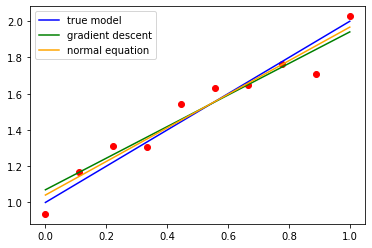

In [28]:
# Now let's test the result and compare
xtest = np.linspace(0,1,100)
Xtilde_test = np.hstack((np.ones((len(xtest), 1)), xtest.reshape(-1,1)))
prediction_grad = Xtilde_test @ beta.reshape(-1,1)
prediction_normal = Xtilde_test @ beta_OLS.reshape(-1,1)
plt.scatter(x, tnoisy, c='r')
plt.plot(x, t, c='blue', label = 'true model')
plt.plot(xtest, prediction_grad, c='g', label = 'gradient descent')
plt.plot(xtest, prediction_normal, c='orange', label='normal equation')
plt.legend()
plt.show()

We can also see how gradient descent decrease the RSS loss over the iterations:

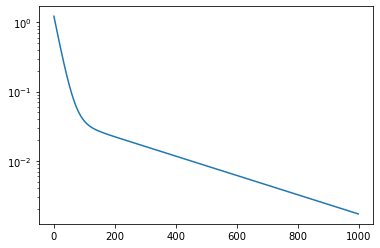

In [29]:
plt.semilogy(RSS)
plt.show()

Finally, let's try using the linar model in scikit-learn:

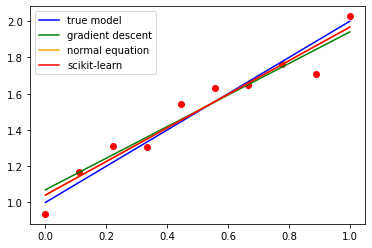

In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x.reshape(-1,1), tnoisy)

prediction_sklearn = reg.predict(xtest.reshape(-1,1))

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t, c='blue', label = 'true model')
plt.plot(xtest, prediction_grad, c='g', label = 'gradient descent')
plt.plot(xtest, prediction_normal, c='orange', label='normal equation')
plt.plot(xtest, prediction_sklearn, c='red', label='scikit-learn')
plt.legend()
plt.show()


# Linear Regression With Polynomial Features

Linear regression model is very versatile, as we can pass nonlinear terms in $x_i$ as our imput feature and learn the nonlinear correlation between the original input features and the labels. As an example, we consider a quadratic model $h_\beta(x)=\beta_0+\beta_1x+\beta_2x^2$.

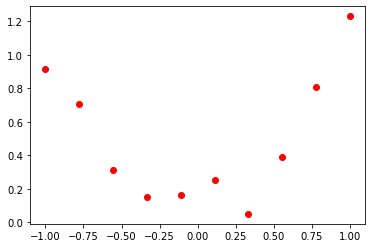

In [56]:
x = np.linspace(-1,1,10)

beta0true = .1
beta1true = .1
beta2true = 1

t = beta0true + beta1true *x + beta2true * (x**2)

tnoisy = t + np.random.normal(0,.1,len(x))

plt.scatter(x, tnoisy, c='r')
plt.show()

[beta0, beta1, beta3] = [0.         0.10067423 0.99381349]


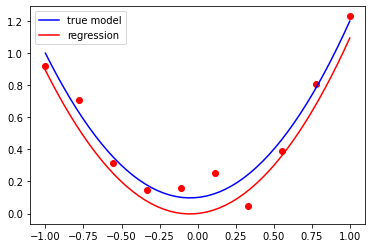

In [67]:
# We fit a linear model using scikit-learn
X = np.vstack((np.ones((1,len(x))),x,x**2)).T # input feature
reg = LinearRegression() # create the model
reg.fit(X, tnoisy) # fit the model
beta = reg.coef_ # get the coefficient
print("[beta0, beta1, beta3] =", beta)

# plot the result
xprediction = np.linspace(-1,1,50)
plt.scatter(x, tnoisy, c='r')
plt.plot(xprediction, beta0true+beta1true*xprediction+beta2true*xprediction**2, c='blue', label='true model')
plt.plot(xprediction, beta[0]+beta[1]*xprediction+beta[2]*xprediction**2, c = 'red', label='regression')
plt.legend()

Although the data looks nonlinear on a plane, we can throw them into 3-dimensional space:

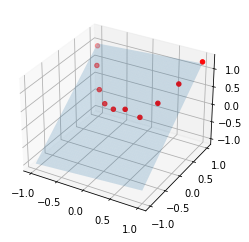

In [74]:
xprediction = np.linspace(-1,1,50)
x2prediction = np.linspace(-1,1,50)

xx, xx2 = np.meshgrid(xprediction, x2prediction)

predictionMat = np.hstack((np.ones((len(xx.flatten()),1)),\
                           xx.flatten().reshape(-1,1), \
                           xx2.flatten().reshape(-1,1)))

predicted_target = reg.predict(predictionMat)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xx, xx2, predicted_target.reshape(np.shape(xx)), alpha=0.2)
ax.scatter(x, x**2, tnoisy, c='r')
plt.show()